# Machine Learning Classification

Now that we have done regression techniques to estimate the number of bikes rented based on the features, let's try something new. One of the other things we can probably do is Classification tasks. A nice classification task we can try is **Can we predict the season based on the other features if the date is not available?** We will try this here.

In [1]:
# Import the required libraries
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, roc_auc_score, ConfusionMatrixDisplay, RocCurveDisplay


In [2]:
# Let's import the dataset using panads
bike_df = pd.read_csv('SeoulBikeData.csv', encoding='cp1252') # The encoding needs to be changed
bike_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


# Data Cleaning

Let's clean the dataset. We are not going to do any EDA here as they have already been done during the regression task. Check the regression file for EDA.

In [3]:
# Rename the features

bike_df.rename(columns={'Date': 'date',
                        'Rented Bike Count': 'bike_count',
                        'Hour': 'hour',
                        'Temperature(°C)': 'temperature',
                        'Humidity(%)': 'humidity',
                        'Wind speed (m/s)': 'wind_speed',
                        'Visibility (10m)': 'visibility',
                        'Dew point temperature(°C)': 'dew_point_temp',
                        'Solar Radiation (MJ/m2)': 'solar_radiation',
                        'Rainfall(mm)': 'rainfall',
                        'Snowfall (cm)': 'snowfall',
                        'Seasons': 'seasons',
                        'Holiday': 'holiday', 
                        'Functioning Day': 'functioning_day'
                        },
          inplace=True)

In [4]:
# Remove the date column
bike_df = bike_df.drop('date', axis=1)
bike_df.head()

,bike_count,hour,temperature,humidity,wind_speed,visibility,dew_point_temp,solar_radiation,rainfall,snowfall,seasons,holiday,functioning_day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
# Now let's convert the functioning day and holiday to binary
bike_df['holiday'] = np.where(bike_df['holiday'] == 'No Holiday', 0, 1)
bike_df['functioning_day'] = np.where(bike_df['functioning_day'] == 'Yes', 1, 0)

In [6]:
# Let's define some functions that we will likely use a lot
def fit_model(X_train_data, X_test_data, y_train_data, y_test_model, model, model_name):
    # Fit the dataset
    model.fit(X_train_data, y_train_data)

    # Now predict the y_values
    y_pred = model.predict(X_test_data)


    # Convert to a pandas Series
    y_pred_series = pd.Series(y_pred, name='Predicted_bike_test')

    # Check the classification metrics.
    bike_f1= f1_score(y_test_model, y_pred_series, average='weighted')
    bike_accuracy = accuracy_score(y_test_model, y_pred_series)
    bike_precision = precision_score(y_test_model, y_pred_series, average='macro')
    bike_recall = recall_score(y_test_model, y_pred_series, average='macro')
    bike_confusion = confusion_matrix(y_test_model, y_pred_series)

    
    print('%s Model f1 score value: ' %model_name, bike_f1)
    print('%s Accuracy score value: ' %model_name, bike_accuracy)
    print('%s Precision score value: ' %model_name, bike_precision)
    print('%s Recall score value: ' %model_name, bike_recall)

    return model, y_pred_series, bike_confusion

In [7]:

def plots(model, cf_matrix):
    # Function for plotting the confusion matrix for the classification.
    disp = ConfusionMatrixDisplay(confusion_matrix=cf_matrix, display_labels=model.classes_)

    disp.plot(cmap='Blues')
    plt.show()

In [8]:
# Let's choose which features you want to use.

X = bike_df[['bike_count', 'hour', 'temperature', 'humidity', 'wind_speed',
       'visibility', 'dew_point_temp', 'solar_radiation', 'rainfall',
       'snowfall', 'holiday', 'functioning_day']]

y = bike_df['seasons']

# Now split data to train-test categories.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 40)

# Remove index of the values
X_train.reset_index(inplace=True, drop=True)
X_test.reset_index(inplace=True, drop=True)
y_train.reset_index(inplace=True, drop=True)
y_test.reset_index(inplace=True, drop=True)

### Let's try some classification tools.

K Nearest Neighbors Model f1 score value:  0.6444950439617984
K Nearest Neighbors Accuracy score value:  0.6449771689497716
K Nearest Neighbors Precision score value:  0.6508677198734687
K Nearest Neighbors Recall score value:  0.6484411609544751


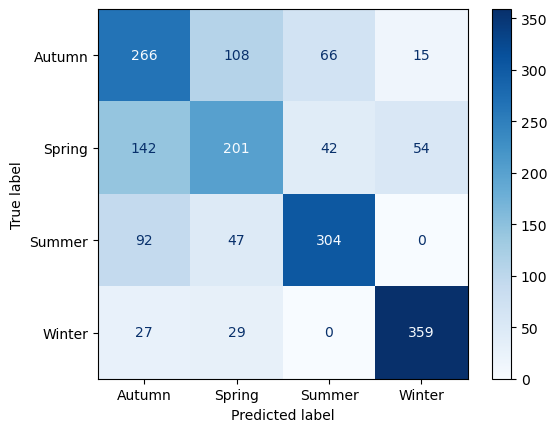

In [9]:
from sklearn.neighbors import KNeighborsClassifier
# Initiate the model
knn = KNeighborsClassifier(n_neighbors=3, p=1)

# Fit the model and get the results
knn_model, knn_y_pred, conf_matrix = fit_model(X_train, X_test, y_train, y_test, knn, 'K Nearest Neighbors')

# Let's also plot the confusion matrix
plots(knn_model, conf_matrix)

The accuracy is not that good. Only about $\sim64\%$. Maybe we can do some more preprocessing to help increase this a bit more? Let's try removing the rows where the bikes were not functioning.

In [10]:
bike_df = bike_df[bike_df['functioning_day'] != 0]

# Let's check the rows are removed.
bike_df[bike_df['functioning_day']==0] 


,bike_count,hour,temperature,humidity,wind_speed,visibility,dew_point_temp,solar_radiation,rainfall,snowfall,seasons,holiday,functioning_day


In [11]:
# Let's redo the splitting of the data again.
X = bike_df[['bike_count', 'hour', 'temperature', 'humidity', 'wind_speed',
       'visibility', 'dew_point_temp', 'solar_radiation', 'rainfall',
       'snowfall', 'holiday']]

y = bike_df['seasons']

# Now split data to train-test categories.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 40)

# Remove index of the values
X_train.reset_index(inplace=True, drop=True)
X_test.reset_index(inplace=True, drop=True)
y_train.reset_index(inplace=True, drop=True)
y_test.reset_index(inplace=True, drop=True)

K Nearest Neighbors Model f1 score value:  0.6224061456176142
K Nearest Neighbors Accuracy score value:  0.6213821618428824
K Nearest Neighbors Precision score value:  0.6264471544455326
K Nearest Neighbors Recall score value:  0.6229214374569764


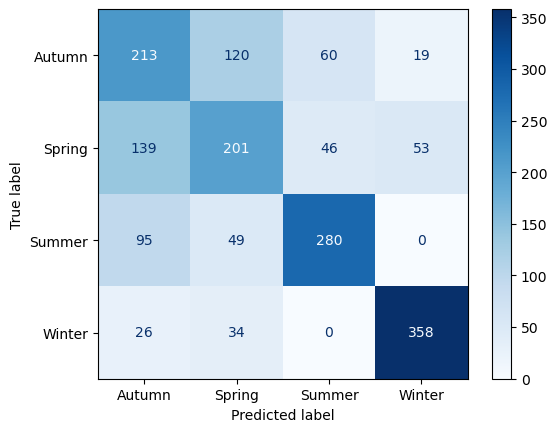

In [12]:
# Let's try the model again.
# Initiate the model
knn = KNeighborsClassifier(n_neighbors=3, p=1)

# Fit the model and get the results
knn_model, knn_y_pred, conf_matrix = fit_model(X_train, X_test, y_train, y_test, knn, 'K Nearest Neighbors')

# Plot the confusion matrix
plots(knn_model, conf_matrix)

Well this did not help much. In fact the accuracy has gone down a little bit. I also tried this by changing some other parameters like algorithms, leaf_size, but even those did not help much. Let's try transforming the X values (Normalizing it or StandardScaler) and check if that helps the model.

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

# Let's try the StandardScaler first. This standardizes the dataset with a mean of 0 and std_dev of 1 using z = (x - u) / s, where u is mean and s is std_dev of original dataset.
# Initiate the scaler
scaler = StandardScaler()

# Transform the X_train and X_test dataset using the Standard Scaler
X_train_standard = scaler.fit_transform(X_train)
X_test_standard = scaler.transform(X_test)


K Nearest Neighbors Model f1 score value:  0.8331010762117311
K Nearest Neighbors Accuracy score value:  0.8340224453632605
K Nearest Neighbors Precision score value:  0.8337618215879925
K Nearest Neighbors Recall score value:  0.8349900951788146


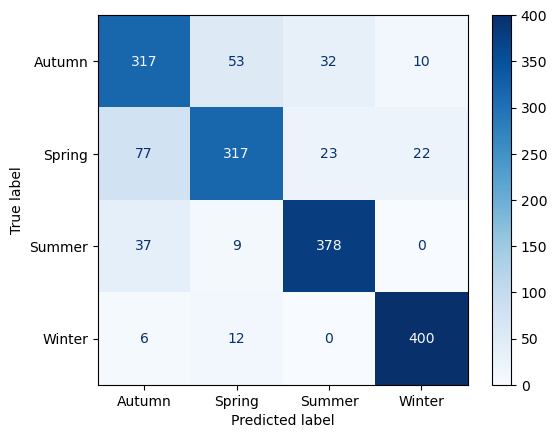

In [14]:
# Let's try the model again.
# Initiate the model
knn_standard = KNeighborsClassifier(n_neighbors=3, p=1)

# Fit the model and get the results
knn_model_standard, knn_y_pred_standard, conf_matrix_standard = fit_model(X_train_standard, X_test_standard, y_train, y_test, knn_standard, 'K Nearest Neighbors')

# Plot the confusion matrix
plots(knn_model_standard, conf_matrix_standard)

This improved the results a lot Now the accuracy is about $83\%$. Would we also get such improved result by Normalizing the data? Let's check.

In [15]:
# Let's try the Normalizer. This converts the dataset to have unit norm. Uses the formula x' = x/∣∣x∣∣. 
scaler = Normalizer()

# We need to transform the X_train and X_test data here because the Multinomial Naive Bayes cannot handle negative values. 
X_train_normal = scaler.fit_transform(X_train)
X_test_normal = scaler.transform(X_test)

K Nearest Neighbors Model f1 score value:  0.643998229497499
K Nearest Neighbors Accuracy score value:  0.6461901949202599
K Nearest Neighbors Precision score value:  0.6461321902008486
K Nearest Neighbors Recall score value:  0.6479360943543191


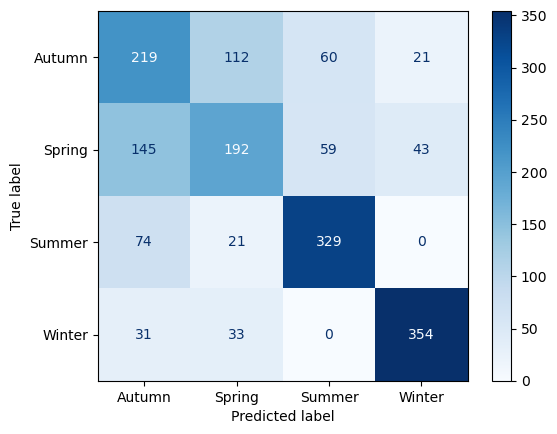

In [16]:
# Let's try the model again.
# Initiate the model
knn_normal = KNeighborsClassifier(n_neighbors=3, p=1)

# Fit the model and get the results
knn_model_normal, knn_y_pred_normal, conf_matrix_normal = fit_model(X_train_normal, X_test_normal, y_train, y_test, knn_normal, 'K Nearest Neighbors')

# Plot the confusion matrix
plots(knn_model_normal, conf_matrix_normal)

This only improved the result from the original by a little bit. Looks like the StandardScaler preprocessing is better for this dataset. Let's go with that.

Now, let's try other Classification methods.

SVC Model f1 score value:  0.7821545178895534
SVC Accuracy score value:  0.787359716479622
SVC Precision score value:  0.7814218691614172
SVC Recall score value:  0.7878236710980082


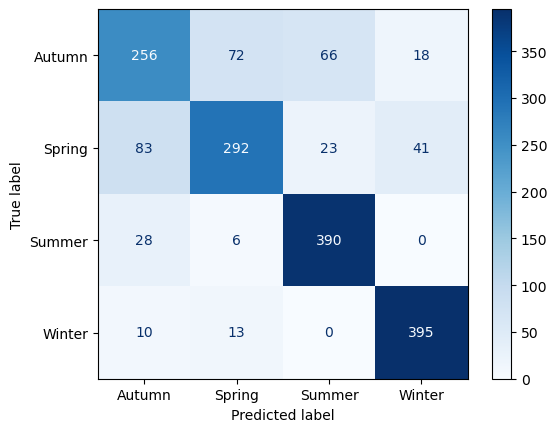

In [17]:
# Let's try Support Vector Classification
from sklearn.svm import SVC

# Let's try the SVC model
svc = SVC(kernel='rbf')

# Fit the model and get the results
svc_model, svc_y_pred, conf_matrix = fit_model(X_train_standard, X_test_standard, y_train, y_test, svc, 'SVC')

# Plot the confusion matrix
plots(svc_model, conf_matrix)

By trying a few different parameters, I could get the best accuracy of about $79\%$ with SVC.

Decision Tree Model f1 score value:  0.8073196997098973
Decision Tree Accuracy score value:  0.8062610750147667
Decision Tree Precision score value:  0.8090741980185587
Decision Tree Recall score value:  0.8066872694551777


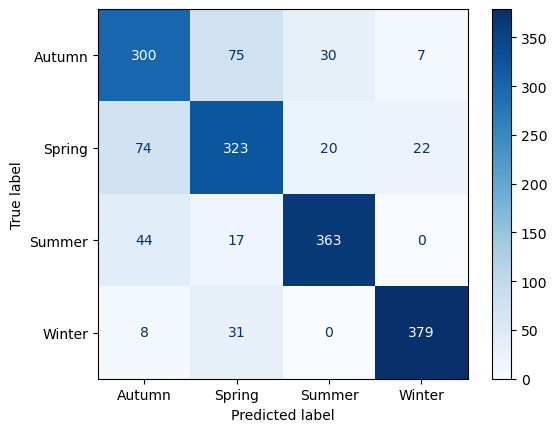

In [18]:
from sklearn.tree import DecisionTreeClassifier

# Let's try the Decision Tree Classifier
dtc = DecisionTreeClassifier(criterion='log_loss', max_depth=20, min_samples_split=10)

# Fit the model and get the results
dtc_model, dtc_y_pred, conf_matrix = fit_model(X_train_standard, X_test_standard, y_train, y_test, dtc, 'Decision Tree')

# Plot the confusion matrix
plots(dtc_model, conf_matrix)

By utilizing the different parameters, we could get it upto $81\%$ with Decision Tree Classifier. Let's try RandomForest. It should imrpove on this.

Random Forest Model f1 score value:  0.8687859887436786
Random Forest Accuracy score value:  0.8700531600708801
Random Forest Precision score value:  0.8687832632190687
Random Forest Recall score value:  0.8703893345281828


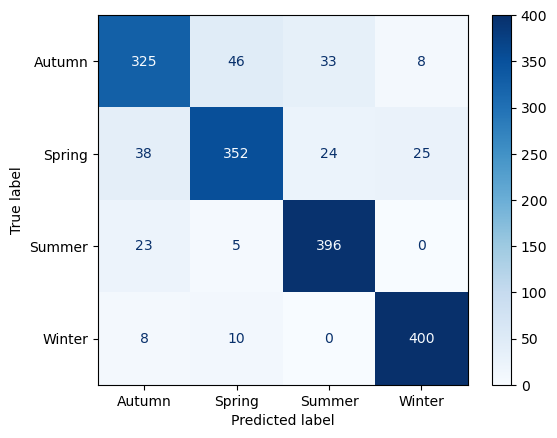

In [19]:
from sklearn.ensemble import RandomForestClassifier

# Let's try the Random Forest Classifier
rfc = RandomForestClassifier(n_estimators = 100)#, criterion = 'log_loss',  max_depth=20, min_samples_leaf=2, min_samples_split=2)

# Fit the model and get the results
rfc_model, rfc_y_pred, rfc_conf_matrix = fit_model(X_train_standard, X_test_standard, y_train, y_test, rfc, 'Random Forest')

# Plot the confusion matrix
plots(rfc_model, rfc_conf_matrix)

This improved the performance to about $87\%$. This is much better. Can we do better by combining two or more classifiers?

Combined Model f1 score value:  0.8351145841785914
Combined Accuracy score value:  0.8369757826343769
Combined Precision score value:  0.834694659955745
Combined Recall score value:  0.8375338806850878


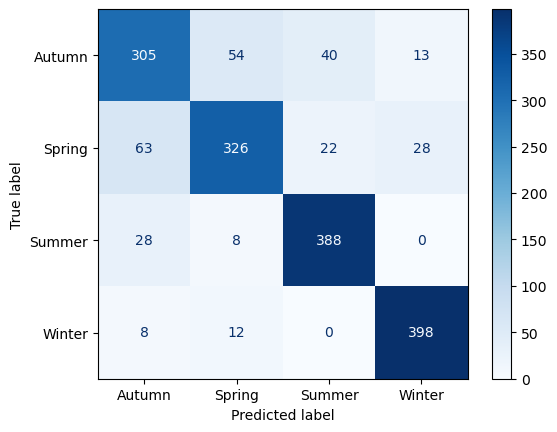

In [20]:
# Initiate the models to use
knn = KNeighborsClassifier(n_neighbors=3, p=1)
svc = SVC(probability=True)
dtc = DecisionTreeClassifier(criterion='log_loss', max_depth=20, min_samples_split=10)

# Let's fit the SVC classifier first
svc.fit(X_train_standard, y_train)

# Get the predicted probabilits of the SVC classifier
svc_predict_proba = svc.predict_proba(X_test_standard)

# Let's fit the K Nearest Neighbor now
knn.fit(X_train_standard, y_train)

# Get the predicted probabilits of the RFC classifier
knn_predict_proba = knn.predict_proba(X_test_standard)

# Let's fit the Decision Tree Classifier now
dtc.fit(X_train_standard, y_train)

# Get the predicted probabilits of the DTC classifier
dtc_predict_proba = dtc.predict_proba(X_test_standard)

# Combine the two probabilities by choosing the maximum
combined_proba = np.maximum(knn_predict_proba, svc_predict_proba, dtc_predict_proba)

# Now choose the maximum index argument for each row for the probabilities
predict_index = np.argmax(combined_proba, axis=1)

# Now get the predicted values
predicted_values = svc.classes_[predict_index]

# Now get the scores and the confusion matrix
f1_val= f1_score(y_test, predicted_values, average='weighted')
accuracy_val = accuracy_score(y_test, predicted_values)
precision_val = precision_score(y_test, predicted_values, average='macro')
recall_val = recall_score(y_test, predicted_values, average='macro')
confusion_val = confusion_matrix(y_test, predicted_values)

    
print('Combined Model f1 score value: ' , f1_val)
print('Combined Accuracy score value: ' , accuracy_val)
print('Combined Precision score value: ' , precision_val)
print('Combined Recall score value: ' , recall_val)

# Now plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_val, display_labels=svc.classes_)

disp.plot(cmap='Blues')
plt.show()



Not really. Doing combined improved a little bit from individual models, but still less than using a random forest.

Let's try Gradient Boosting Classifier.

Gradient Boosting Classifier Model f1 score value:  0.8572996898141079
Gradient Boosting Classifier Accuracy score value:  0.8576491435321913
Gradient Boosting Classifier Precision score value:  0.8573224367679533
Gradient Boosting Classifier Recall score value:  0.8576027220937853


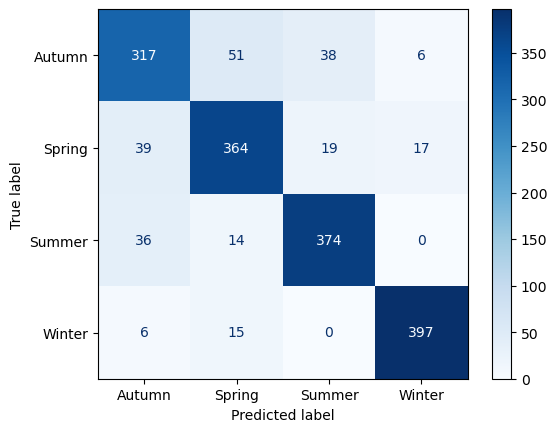

In [21]:
from sklearn.ensemble import GradientBoostingClassifier

# Let's try the Gradient Boosting Classifier
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1, min_samples_split=2, max_leaf_nodes=20, max_depth=4, max_features='log2',random_state=42)

# Fit the model and get the results
gbc_model, gbc_y_pred, gbc_conf_matrix = fit_model(X_train_standard, X_test_standard, y_train, y_test, gbc, 'Gradient Boosting Classifier')

# Plot the confusion matrix
plots(gbc_model, gbc_conf_matrix)

Gradient boosting also seems to do much better with about the same accuracy as a random forest.

Let's also try the Naive Bayes Classifier.

Gaussian Naive Bayes Model f1 score value:  0.6195439093321087
Gaussian Naive Bayes Accuracy score value:  0.6562315416420555
Gaussian Naive Bayes Precision score value:  0.6437778385011121
Gaussian Naive Bayes Recall score value:  0.6542476814268308


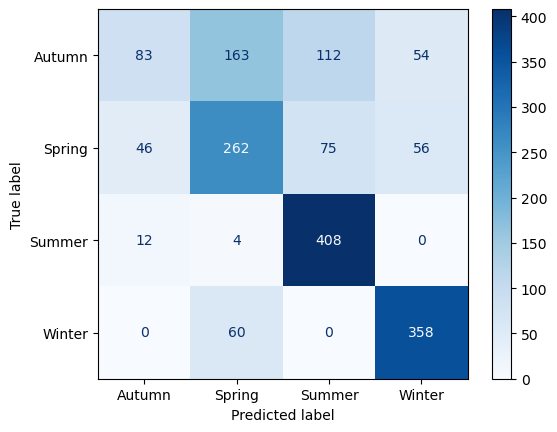

In [22]:
from sklearn.naive_bayes import GaussianNB

# Initiate the model
gnb = GaussianNB(var_smoothing=1)

# Fit the model and get the results
gnb_model, gnb_y_pred, gnb_conf_matrix = fit_model(X_train_standard, X_test_standard, y_train, y_test, gnb, 'Gaussian Naive Bayes')

# Plot the confusion matrix
plots(gnb_model, gnb_conf_matrix)


The Naive Bayes Classifier did not do too well. Let's try adding the Naive Bayes with other to see if this gives any improvement. Let's try K Nearest Neighbors.

Combined Model f1 score value:  0.8281295046031881
Combined Accuracy score value:  0.8310691080921441
Combined Precision score value:  0.8280400839408879
Combined Recall score value:  0.831551503138021


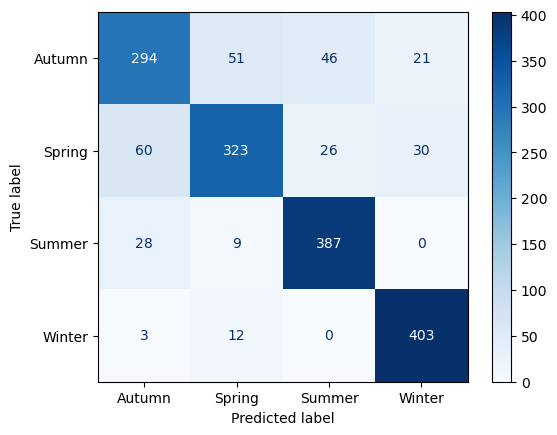

In [23]:
# Let's fit the K Nearest Neighbor classifier first
knn.fit(X_train_standard, y_train)

# Get the predicted probabilits of the KNN classifier
knn_predict_proba = knn.predict_proba(X_test_standard)

# Let's fit the Gaussian Naive Bayes now
gnb.fit(X_train_standard, y_train)

# Get the predicted probabilits of the Gaussian Maive Bayes classifier
gnb_predict_proba = gnb.predict_proba(X_test_standard)

# Combine the two probabilities by choosing the maximum
combined_proba = np.maximum(gnb_predict_proba, knn_predict_proba)

# Now choose the maximum index argument for each row for the probabilities
predict_index = np.argmax(combined_proba, axis=1)

# Now get the predicted values
predicted_values = knn.classes_[predict_index]

# Now get the scores and the confusion matrix
f1_val= f1_score(y_test, predicted_values, average='weighted')
accuracy_val = accuracy_score(y_test, predicted_values)
precision_val = precision_score(y_test, predicted_values, average='macro')
recall_val = recall_score(y_test, predicted_values, average='macro')
confusion_val = confusion_matrix(y_test, predicted_values)

    
print('Combined Model f1 score value: ' , f1_val)
print('Combined Accuracy score value: ' , accuracy_val)
print('Combined Precision score value: ' , precision_val)
print('Combined Recall score value: ' , recall_val)

# Now plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_val, display_labels=knn.classes_)

disp.plot(cmap='Blues')
plt.show()


This one did much better. Let's now try to combine the two best working ones: the Random Forest Model, and the Gradient Boosting Model.


Combined Model f1 score value:  0.8669872638317911
Combined Accuracy score value:  0.867690490253987
Combined Precision score value:  0.8671821981937965
Combined Recall score value:  0.867596994677202


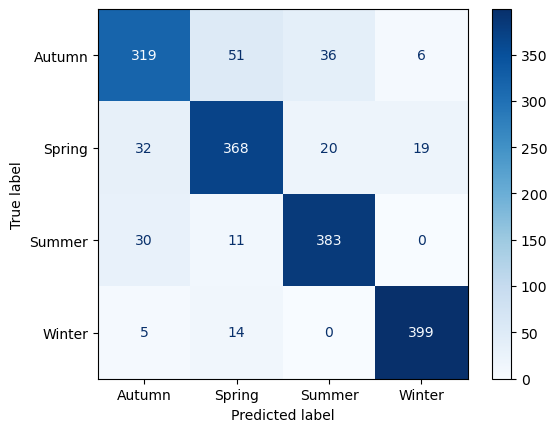

In [24]:
# Let's fit the Random Forest classifier first
rfc.fit(X_train_standard, y_train)

# Get the predicted probabilits of the Random Forest classifier
rfc_predict_proba = rfc.predict_proba(X_test_standard)

# Let's fit the Gradient Boosting Classifier
gbc.fit(X_train_standard, y_train)

# Get the predicted probabilits of the Gaussian Maive Bayes classifier
gbc_predict_proba = gbc.predict_proba(X_test_standard)

# Combine the two probabilities by choosing the maximum
combined_proba = np.maximum(gbc_predict_proba, rfc_predict_proba)

# Now choose the maximum index argument for each row for the probabilities
predict_index = np.argmax(combined_proba, axis=1)

# Now get the predicted values
predicted_values = rfc.classes_[predict_index]

# Now get the scores and the confusion matrix
f1_val= f1_score(y_test, predicted_values, average='weighted')
accuracy_val = accuracy_score(y_test, predicted_values)
precision_val = precision_score(y_test, predicted_values, average='macro')
recall_val = recall_score(y_test, predicted_values, average='macro')
confusion_val = confusion_matrix(y_test, predicted_values)

    
print('Combined Model f1 score value: ' , f1_val)
print('Combined Accuracy score value: ' , accuracy_val)
print('Combined Precision score value: ' , precision_val)
print('Combined Recall score value: ' , recall_val)

# Now plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_val, display_labels=rfc.classes_)

disp.plot(cmap='Blues')
plt.show()


This is still only $\sim87\%$. Looks like we can do about $80 - 88\%$ the best for this dataset. This is not too bad.